# 라이브러리 불러오기

In [1]:
import geopandas as gpd

In [2]:
import os
import time
from tqdm import tqdm
import rasterio as rio
from rasterio.plot import show

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# matplotlib 옵션 설정

In [3]:
plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# 자료 처리시간 계산

In [4]:
current_sec =time.time()
current_sec

1606956864.5539086

In [5]:
tm = time.localtime(current_sec)
print("year:", tm.tm_year)
print("month:", tm.tm_mon)
print("day:", tm.tm_mday)
print("hour:", tm.tm_hour)
print("minute:", tm.tm_min)
print("second:", tm.tm_sec)

year: 2020
month: 12
day: 3
hour: 9
minute: 54
second: 24


In [6]:
time.time()-current_sec

3.3394277095794678

# csv 파일을 이용하여 환경변수 값 추출하기

### 1. 함수정의

In [66]:
def coord2value(csv_file, tif_list, coords):
    start = time.time()
    df = csv_file.copy()
    tif_list = tif_list.copy()
    coord = coords.copy()
    for idx, tif_path in tqdm(enumerate(tif_list)):
        print(idx, tif_path)
        with rio.open(tif_path) as tif:
            df['bio' + str(idx)] = pd.DataFrame([x for x in tif.sample(coord)])
            df['bio' + str(idx) ] = df['bio' + str(idx)].apply(lambda x: float(x))
    print(f"작업시긴은 {time.time()-start}초 걸렸습니다.")
    return df

In [58]:
# for idx, tif_path in tqdm(enumerate(tif_list)):
# #     print(idx, tif)
#     with rio.open(tif_path) as tif:
#         gis['bio' + str(idx)] = pd.DataFrame([x for x in tif.sample(coord)])
#         gis['bio' + str(idx) ] = gis['bio' + str(idx)].apply(lambda x: float(x))

### 2. 환경변수 리스트 불러오기 위한 파일경로 지정

In [59]:
tif_list = glob(r"G:\maxent_work\env\tif_file\*.tif")
len(tif_list)

20

### 3. 생물종 출현지점 csv파일 불러오기

In [61]:
gis = pd.read_csv("data/species3.csv", encoding='euc-kr') # 엑셀프로그램으로 만든 csv파일을 불러올때 반드시 encoding 옵션을 euc-kr로 설정
print(gis.shape)
gis.head()

(82, 3)


,species,lon,lat
0,백부자,128.341556,36.905056
1,백부자,128.344111,36.905611
2,백부자,128.343833,36.905500
3,백부자,128.343861,36.904472
4,백부자,128.343639,36.904528


In [65]:
gis_coords = [(x,y) for x, y in zip(gis.lon, gis.lat)]
gis_coords[:10]

[(128.341556, 36.905056),
 (128.3441111, 36.90561111),
 (128.3438333, 36.9055),
 (128.3438611, 36.90447222),
 (128.3436389, 36.90452778),
 (128.5038333, 37.259305600000005),
 (128.5031111, 37.2598333),
 (128.50411110000002, 37.259305600000005),
 (128.50297220000002, 37.2598333),
 (128.5027778, 37.2600833)]

### 4. 생물종 위치에 해당하는 환경변수 값 추출하기

In [67]:
gis_val = coord2value(gis, tif_list, gis_coords)

5it [00:00, 46.75it/s]

0 G:\maxent_work\env\tif_file\alt_overzero.tif
1 G:\maxent_work\env\tif_file\bio_01.tif
2 G:\maxent_work\env\tif_file\bio_02.tif
3 G:\maxent_work\env\tif_file\bio_03.tif
4 G:\maxent_work\env\tif_file\bio_04.tif
5 G:\maxent_work\env\tif_file\bio_05.tif
6 G:\maxent_work\env\tif_file\bio_06.tif
7 G:\maxent_work\env\tif_file\bio_07.tif
8 G:\maxent_work\env\tif_file\bio_08.tif
9 G:\maxent_work\env\tif_file\bio_09.tif


15it [00:00, 47.30it/s]

10 G:\maxent_work\env\tif_file\bio_10.tif
11 G:\maxent_work\env\tif_file\bio_11.tif
12 G:\maxent_work\env\tif_file\bio_12.tif
13 G:\maxent_work\env\tif_file\bio_13.tif
14 G:\maxent_work\env\tif_file\bio_14.tif
15 G:\maxent_work\env\tif_file\bio_15.tif
16 G:\maxent_work\env\tif_file\bio_16.tif
17 G:\maxent_work\env\tif_file\bio_17.tif
18 G:\maxent_work\env\tif_file\bio_18.tif
19 G:\maxent_work\env\tif_file\bio_19.tif


20it [00:00, 47.42it/s]

작업시긴은 0.42479443550109863초 걸렸습니다.


In [68]:
gis_val.head()

,species,lon,lat,bio0,bio1,bio2,bio3,bio4,bio5,bio6,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,백부자,128.341556,36.905056,409.0,98.0,220.0,29.0,9788.0,280.0,-105.0,...,220.0,-34.0,1284.0,305.0,26.0,81.0,713.0,87.0,713.0,87.0
1,백부자,128.344111,36.905611,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
2,백부자,128.343833,36.905500,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
3,백부자,128.343861,36.904472,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
4,백부자,128.343639,36.904528,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0


### 5. 대상지역 배경지점 csv파일 불러오기

In [70]:
bg = pd.read_csv("data/background_pt.csv", encoding='euc-kr')
print(bg.shape)
bg.head()

(10000, 5)


,x,y,raw,cumulative,Logistic
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04


In [71]:
bg_coords = [(x, y) for x,y in zip(bg.x, bg.y)]
print(len(bg_coords))
bg_coords[:10]

10000


[(85.10428874, 41.88762207),
 (119.06262209999998, 32.4209554),
 (88.0459554, 23.9459554),
 (117.6209554, 29.8459554),
 (62.36262207, 53.06262207),
 (139.8459554, 37.1709554),
 (84.8709554, 37.10428874),
 (76.28762207, 55.4709554),
 (92.68762207, 35.9709554),
 (125.58762209999999, 39.5959554)]

### 6. 대상지점 위치에 해당하는 환경변수 값 추출하기

In [72]:
bg_val = coord2value(bg, tif_list, bg_coords)

0it [00:00, ?it/s]

0 G:\maxent_work\env\tif_file\alt_overzero.tif


1it [00:01,  1.71s/it]

1 G:\maxent_work\env\tif_file\bio_01.tif


2it [00:03,  1.69s/it]

2 G:\maxent_work\env\tif_file\bio_02.tif


3it [00:04,  1.68s/it]

3 G:\maxent_work\env\tif_file\bio_03.tif


4it [00:06,  1.67s/it]

4 G:\maxent_work\env\tif_file\bio_04.tif


5it [00:20,  5.43s/it]

5 G:\maxent_work\env\tif_file\bio_05.tif


6it [01:09, 18.53s/it]

6 G:\maxent_work\env\tif_file\bio_06.tif


7it [01:58, 27.55s/it]

7 G:\maxent_work\env\tif_file\bio_07.tif


8it [02:33, 29.88s/it]

8 G:\maxent_work\env\tif_file\bio_08.tif


9it [03:06, 30.56s/it]

9 G:\maxent_work\env\tif_file\bio_09.tif


10it [03:43, 32.56s/it]

10 G:\maxent_work\env\tif_file\bio_10.tif


11it [04:14, 32.26s/it]

11 G:\maxent_work\env\tif_file\bio_11.tif


12it [04:46, 31.97s/it]

12 G:\maxent_work\env\tif_file\bio_12.tif


13it [05:17, 31.70s/it]

13 G:\maxent_work\env\tif_file\bio_13.tif


14it [05:48, 31.66s/it]

14 G:\maxent_work\env\tif_file\bio_14.tif


15it [06:20, 31.70s/it]

15 G:\maxent_work\env\tif_file\bio_15.tif


16it [06:52, 31.77s/it]

16 G:\maxent_work\env\tif_file\bio_16.tif


17it [07:23, 31.63s/it]

17 G:\maxent_work\env\tif_file\bio_17.tif


18it [07:55, 31.58s/it]

18 G:\maxent_work\env\tif_file\bio_18.tif


19it [08:26, 31.53s/it]

19 G:\maxent_work\env\tif_file\bio_19.tif


20it [08:58, 26.93s/it]

작업시긴은 538.5493273735046초 걸렸습니다.


In [73]:
bg_val.head()

,x,y,raw,cumulative,Logistic,bio0,bio1,bio2,bio3,bio4,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04,918.0,108.0,247.0,27.0,12015.0,...,247.0,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03,52.0,152.0,267.0,24.0,9154.0,...,267.0,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08,24.0,264.0,306.0,42.0,4234.0,...,306.0,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02,280.0,159.0,262.0,24.0,8382.0,...,262.0,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04,213.0,28.0,193.0,22.0,13614.0,...,193.0,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0


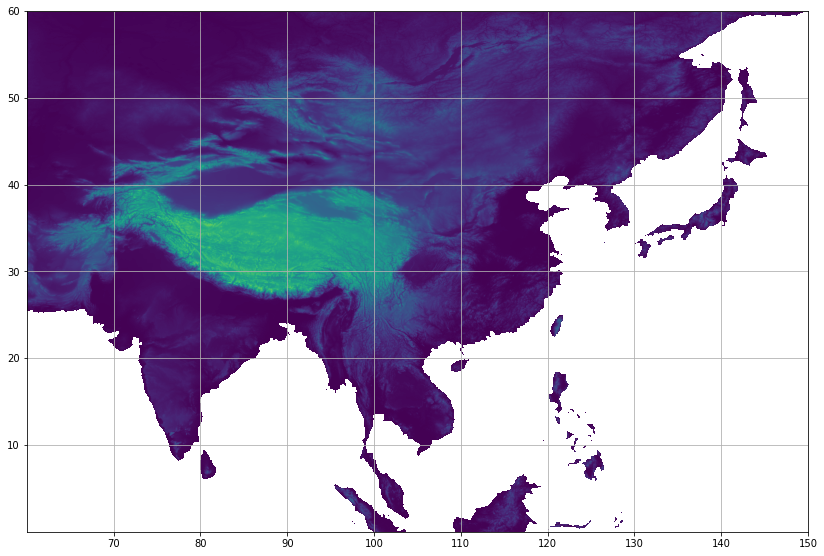

<AxesSubplot:>

In [75]:
alt = rio.open(r'G:\maxent_work\env\tif_file\alt_overzero.tif')
show(alt)

In [77]:
array = alt.read(1)

In [78]:
array.shape

(7200, 10800)

In [79]:
type(array)

numpy.ndarray

In [81]:
array[:10]

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [  246,   260,   271, ...,   581,   558,   623],
       [  255,   266,   283, ...,   432,   358,   435],
       ...,
       [  249,   251,   265, ...,   167,   180,   181],
       [  243,   244,   242, ...,   169,   173,   167],
       [  238,   239,   244, ...,   138,   137,   147]])